### 问题描述：

有 <i>n</i> 个底面为长方形的货柜需要租用库房存放，且每个货柜必须放地面上，所有货柜底面宽度都等于库房宽度。第 <i>i</i> 个货柜占用库房面积大小只需用底面长度 <i>L<sub>i</sub></i> 表示，<i>i = 0, 1, ..., n</i>。设库房总长度为 <i>D</i>，第 <i>i</i> 号货柜存储收益 <i>V<sub>i</sub></i>。怎样选择放入的货柜，使库房出租收益最大？

### 解题技巧：

1. **穷举分析**
2. **确定边界**
3. **递推方程**
4. **状态转移方程**

**目标函数：**
$$\max\sum_{i=1}^nv_ix_i$$
**约束条件：**
$$\sum_{i=1}^{n}l_{i}x_{i}\leqslant D,\quad x_{i}=0,1$$
**递推公式：**<br>
设：
$$V[k,l]$$
为货柜长度为 <i>l</i> ,选择放入前 <i>k</i> 个货物时的最大收益。则：
$$V[k,l]=\begin{cases}V[k-1,l],&l<l_k\\\max\{V[k-1,l],V[k-1,l-l_k]+v_k\},&D\geqslant l\geqslant l_k\end{cases},\quad k>1$$
**确定边界：**
$$V[1,l]=\begin{cases}v_1,&l\geqslant l_1\\0,&l<l_1\end{cases}$$


### 伪码表示：
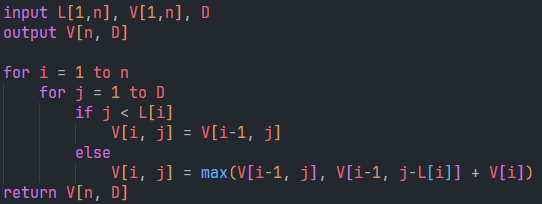

In [ ]:
# 伪码实现：
def max_profit(n, D, L, V):

    # 初始化二维数组存储收益信息
    dp = [[0] * (D + 1) for _ in range(n + 1)]
    
    # 遍历每一个货柜
    for i in range(1, n + 1):
        # 遍历每一个库房长度
        for j in range(1, D + 1):
            if j < L[i - 1]:
                # 如果当前货柜长度大于库房长度，则无法放入
                dp[i][j] = dp[i - 1][j]
            else:
                # 否则，当前货柜可以放入，取放入和不放入的最大值
                dp[i][j] = max(dp[i - 1][j], dp[i - 1][j - L[i - 1]] + V[i - 1])
    
    return dp[n][D]

n = 4  # 货柜数量
D = 10  # 库房长度
L = [2, 3, 4, 7]  # 货柜长度
V = [1, 3, 6, 9]  # 货柜收益

result = max_profit(n, D, L, V)
print("最大收益为：", result)

最大收益为： 12


### 复杂度分析：
* 时间复杂度：两层循环次数 n * D，循环内部执行比较和赋值（常数时间操作）。故时间复杂度是O(nD)。
* 空间复杂度：使用了一个二维数组, 大小是 (n + 1) x (D + 1)。故空间复杂度是O(nD)。

### 问题推广：

把 0-1 背包问题加以推广，设有 <i>n</i> 种物品，第 <i>i</i> 种物品的价值是 <i>v<sub>i</sub></i>，重量是 <i>w<sub>i</sub></i>，体积是 <i>c<sub>i</sub></i>，且装入背包的重量限制是 <i>W</i>，体积是 <i>V</i>。问如何选择装入背包的物品使得其总重不超过 <i>W</i>，总体积不超过 <i>V</i> 且价值达到最大？

### 伪码表示：
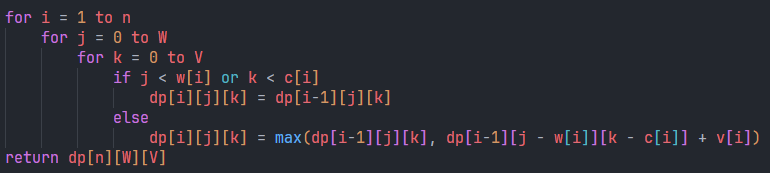

In [ ]:
def max_profit(n, W, V, weights, volumes, values):

    # 初始化三维数组存储收益信息
    dp = [[[0] * (V + 1) for _ in range(W + 1)] for _ in range(n + 1)]
    
    # 遍历每一个物品
    for i in range(1, n + 1):
        wi = weights[i - 1]
        vi = volumes[i - 1]
        val = values[i - 1]
        # 遍历每一个重量
        for w in range(W + 1):
            # 遍历每一个体积
            for v in range(V + 1):
                if w >= wi and v >= vi:
                    # 如果当前物品重量和体积小于等于限制，取放入和不放入的最大值
                    dp[i][w][v] = max(dp[i - 1][w][v], dp[i - 1][w - wi][v - vi] + val)
                else:
                    # 否则，当前物品无法放入
                    dp[i][w][v] = dp[i - 1][w][v]
    return dp[n][W][V]

n = 4  # 物品数量
W = 10  # 重量限制
V = 12  # 体积限制
weights = [2, 3, 4, 5]    # 物品重量
volumes = [3, 4, 5, 6]    # 物品体积
values = [3, 4, 5, 6]     # 物品价值

max_value = max_profit(n, W, V, weights, volumes, values)
print("最大价值为：", max_value)

最大价值为： 12


### 复杂度分析：
* 时间复杂度：O(nWV)
* 空间复杂度：O(nWV)